In [2]:
import pandas as pd
import numpy as np
import nltk 
from collections import Counter
from nltk.tokenize import word_tokenize
import seaborn as sns
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import wordcloud


In [3]:
df=pd.read_csv ('dataset.csv')
df.tail(12)

,Unnamed: 0,ID,label,tanggal,judul,narasi,nama file gambar,data_cleaned,data,data_clean,databersih
4137,4137,95132.0,1,24/08/2018,Ustaz Di Cianjur Dipersekusi dan Dibacok,"Kalian terlalu sibuk posting tentang Pilpres, ...",95132.jpg,sibuk posting pilpres sibuk posting preside...,sibuk posting pilpres sibuk posting preside...,sibuk posting pilpres sibuk posting 2019 pre...,sibuk posting pilpres sibuk posting 2019 pre...
4138,4138,840603.0,1,24/08/2018,Website Surveyfadlizon.com Milik Waketum Gerindra,Kalau ada surveyfadlizon.com itu bukan punya ...,840603.jpg,surveyfadlizon com pusat hoax nasional wakil k...,surveyfadlizon com pusat hoax nasional wakil k...,surveyfadlizon com pusat hoax nasional wakil k...,surveyfadlizon com pusat hoax nasional wakil k...
4139,4139,316308.0,0,24/08/2018,: BBKSDA Jatim Mengklarifikasi Bahwa Wisata Al...,Menyusul beredarnya surat edaran rencana penut...,316308.jpg,susul edar surat edar rencana tutup kawah ijen...,susul edar surat edar rencana tutup kawah ijen...,susul edar surat edar rencana tutup kawah ijen...,susul edar surat edar rencana tutup kawah ijen...
4140,4140,365467.0,0,24/08/2018,DIRUMORKAN PUNYA ATURAN BARU PEMBATASAN WAKTU ...,"Kepala Humas BPJS Kesehatan, M. Iqbal Anas Ma...",365467.jpg,kepala humas bpjs sehat iqbal anas maruf uji l...,kepala humas bpjs sehat iqbal anas maruf uji l...,kepala humas bpjs sehat iqbal anas maruf uji l...,kepala humas bpjs sehat iqbal anas maruf uji l...
4141,4141,332690.0,1,24/08/2018,DAFTAR NAMA HONORER YANG LOLOS SELEKSI CPNS 2018,Akhirnya pak bu inilah yang kita tunggu sekia...,332690.jpg,sekian,sekian,sekian,sekian
4142,4142,496530.0,1,24/08/2018,Akun Twitter @LawanPolitikJKW adalah Milik Fer...,Beberapa hari terakhir ini telah beredar luas ...,496530.jpg,edar luas capture buah twitter foto nama sah u...,edar luas capture buah twitter foto nama sah u...,edar luas capture buah twitter foto nama sah u...,edar luas capture buah twitter foto nama sah u...
4143,4143,832401.0,0,24/08/2018,Pollycarpus Bantah Jadi Kader Partai Berkarya,Setelah lama dikabarkan telah menjadi kader Pa...,832401.jpg,kabar kader partai karya pollycarpus budihari ...,kabar kader partai karya pollycarpus budihari ...,kabar kader partai karya pollycarpus budihari ...,kabar kader partai karya pollycarpus budihari ...
4144,4144,160657.0,1,24/08/2018,Omongan Bin Masak Ngak DIperhatikan,Omongan Bin Masak Ngak DIperhatikan.. Ngeri N...,160657.jpg,omong bin masak ngak perhati ngeri ngeri sedap...,omong bin masak ngak perhati ngeri ngeri sedap...,omong bin masak ngak perhati ngeri ngeri sedap...,omong bin masak ngak perhati ngeri ngeri sedap...
4145,4145,504715.0,1,24/08/2018,Beginilah Caranya China Menghancurkan Dunia,Disinformasi yang pernah beberapa kali diedark...,504715.jpg,disinformasi edar pil china turki,disinformasi edar pil china turki,disinformasi edar pil china turki,disinformasi edar pil china turki
4146,4146,480136.0,0,24/08/2018,Bappenas Bantah Tudingan Sandiaga Uno yang Seb...,"Itu sama sekali tidak benar, mereka (BPS) pun...",480136.jpg,bps undang independensi menteri rencana bangun...,bps undang independensi menteri rencana bangun...,bps undang independensi menteri rencana bangun...,bps undang independensi menteri rencana bangun...


In [4]:
df.dtypes

Unnamed: 0            int64
ID                  float64
label                 int64
tanggal              object
judul                object
narasi               object
nama file gambar     object
data_cleaned         object
data                 object
data_clean           object
databersih           object
dtype: object

In [5]:
df_pos = df[df['label']==0]['databersih']
df_pos.to_csv('nonhoax.csv', encoding='utf8', index = False)
df_neg = df[df['label']==1]['databersih']
df_neg.to_csv('hoax.csv', encoding='utf8', index = False)

C:\Users\tamu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
C:\Users\tamu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


Proporsi label


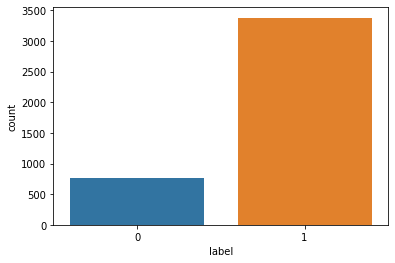

In [6]:
print("Proporsi label")
ax = sns.countplot(df['label'])

In [7]:
df['label'].value_counts()

1    3380
0     769
Name: label, dtype: int64

In [8]:
# Bentuk VSM-nya
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(lowercase=True, smooth_idf= True, sublinear_tf=True, 
                                   ngram_range=(1, 2), max_df=0.90, min_df=2)

In [9]:
##TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
#vectorizer = TfidfVectorizer(ngram_range=(1, 2))
vectorizer = TfidfVectorizer(max_df=0.1, min_df=5, ngram_range=(1, 2))

listdata=df['data_cleaned'].values.astype('object')
listdata = [d for d in listdata]

listdata
v = TfidfVectorizer(decode_error='replace', encoding='utf-8')
tfidf = v.fit_transform(df['data_cleaned'].values.astype('U'))
y = df.iloc[:, 2].values
print(tfidf.shape, len(y)) 

(4149, 12495) 4149


In [10]:
#balancing
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

oversampling_tf = SMOTE(sampling_strategy='all')

oversampling_tf.fit(tfidf,df['label'])

SMOTE(sampling_strategy='all')

In [11]:
#fitur_tf, label_tf = oversampling_tf.fit_sample(tfidf,df['label'])
#print(fitur_tf.shape)
#print(label_tf.shape)

In [12]:
from sklearn.model_selection import train_test_split
seed = 1
X = df['data_cleaned'].values.astype('U')
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
X_train = vectorizer.fit_transform(X_train) # "Fit_Transform"
X_test = vectorizer.transform(X_test) # Perhatikan disini hanya "Transform"

print(X_train.shape, X_test.shape)

(2904, 1807) (1245, 1807)


In [13]:
def hapusKosong(X,y):
    y = y[X.getnnz(1)>0] # delete label dokumen yang memiliki row =0 di tfidf-nya
    X = X[X.getnnz(1)>0] # Remove Zero Rows
    return X, y

X_train, y_train = hapusKosong(X_train, y_train)
X_test, y_test = hapusKosong(X_test, y_test)
print(X_train.shape, X_test.shape)

(2871, 1807) (1232, 1807)


In [14]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dSVM = svm.SVC( kernel = 'linear')
dSVM.fit(X_train, y_train)
y_SVM = dSVM.predict(X_test)
print('Akurasi = ', accuracy_score(y_test, y_SVM))
print(confusion_matrix(y_test, y_SVM))
print(classification_report(y_test, y_SVM))

Akurasi =  0.8222402597402597
[[ 34 201]
 [ 18 979]]
              precision    recall  f1-score   support

           0       0.65      0.14      0.24       235
           1       0.83      0.98      0.90       997

    accuracy                           0.82      1232
   macro avg       0.74      0.56      0.57      1232
weighted avg       0.80      0.82      0.77      1232



In [15]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


model = neighbors.KNeighborsClassifier()
kNN = model.fit(X_train, y_train)
y_kNN = kNN.predict(X_test)

print('Akurasi = ', accuracy_score(y_test, y_kNN))
print(confusion_matrix(y_test, y_kNN))
print(classification_report(y_test, y_kNN))

Akurasi =  0.7962662337662337
[[ 38 197]
 [ 54 943]]
              precision    recall  f1-score   support

           0       0.41      0.16      0.23       235
           1       0.83      0.95      0.88       997

    accuracy                           0.80      1232
   macro avg       0.62      0.55      0.56      1232
weighted avg       0.75      0.80      0.76      1232



In [16]:
from sklearn.naive_bayes import GaussianNB
naivbayes = GaussianNB()
naivbayes.fit(X_train.toarray(), y_train)
y_NB = naivbayes.predict(X_test.toarray())
print(confusion_matrix(y_test, y_NB))
print(accuracy_score(y_test, y_NB))
print(classification_report(y_test, y_NB))

[[137  98]
 [453 544]]
0.5527597402597403
              precision    recall  f1-score   support

           0       0.23      0.58      0.33       235
           1       0.85      0.55      0.66       997

    accuracy                           0.55      1232
   macro avg       0.54      0.56      0.50      1232
weighted avg       0.73      0.55      0.60      1232



In [17]:
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression(solver="lbfgs", multi_class="auto")
model_logreg.fit(X_train, y_train)
Y_pred = model_logreg.predict(X_test)
print("Accuracy:", accuracy_score(Y_pred, y_test))
print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))

Accuracy: 0.8173701298701299
[[ 19 216]
 [  9 988]]
              precision    recall  f1-score   support

           0       0.68      0.08      0.14       235
           1       0.82      0.99      0.90       997

    accuracy                           0.82      1232
   macro avg       0.75      0.54      0.52      1232
weighted avg       0.79      0.82      0.75      1232



In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_rf))
print(confusion_matrix(y_test, y_rf))
print(classification_report(y_test, y_rf))

Accuracy: 0.8157467532467533
[[ 40 195]
 [ 32 965]]
              precision    recall  f1-score   support

           0       0.56      0.17      0.26       235
           1       0.83      0.97      0.89       997

    accuracy                           0.82      1232
   macro avg       0.69      0.57      0.58      1232
weighted avg       0.78      0.82      0.77      1232



In [19]:
!pip install graphviz dtreeviz
from sklearn.model_selection import cross_val_score
import graphviz, pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns
from pandas.plotting import scatter_matrix 
from sklearn import model_selection, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from dtreeviz.trees import *
from IPython.core.display import display, HTML
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import svm, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import VotingClassifier
from collections import Counter
sns.set(style="ticks", color_codes=True)

Regresi Logistik [0.8194444444444444, 0.8222996515679443, 0.818815331010453, 0.8292682926829268, 0.8153310104529616, 0.8257839721254355]
Random Forest [0.8159722222222222, 0.7909407665505227, 0.8013937282229965, 0.818815331010453, 0.8327526132404182, 0.8013937282229965]
SVM [0.8194444444444444, 0.818815331010453, 0.8118466898954704, 0.8257839721254355, 0.818815331010453, 0.8222996515679443]


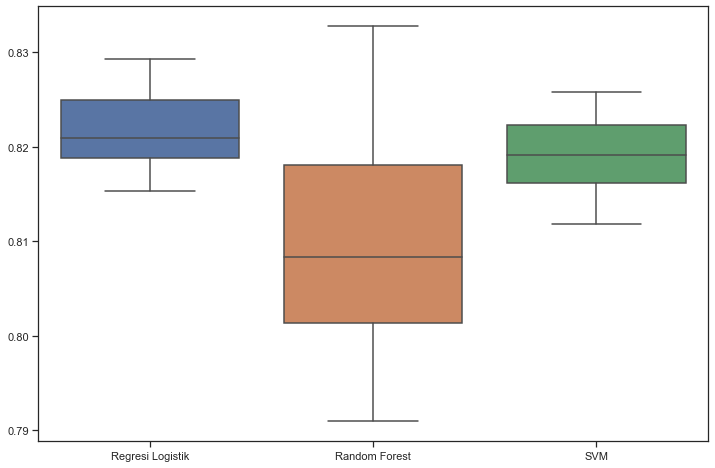

In [28]:
clf = LogisticRegression(solver='liblinear')
rf = RandomForestClassifier()
svm_ = svm.SVC()
Models = [('Regresi Logistik', clf), ('Random Forest', rf), ('SVM', svm_)]
Scores = {}
for model_name, model in Models:
    Scores[model_name] = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

dt = pd.DataFrame.from_dict(Scores)
plt.figure(figsize=(12,8))
ax = sns.boxplot(data=dt)
for m, s in Scores.items():
    print(m, list(s)[:6])

# cross validasi

In [21]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("best parameters",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tamu\Anaconda3\lib\site-packages\

C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

best parameters {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.8220141308555944


C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\tamu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.81469948        nan 0.81469948        nan 0.81469948
        nan 0.82201413        nan 0.79901641        nan 0.75756751
        nan 0.74468036]
  category=UserWarning


In [22]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline 

In [23]:
#grid search
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [10,20,30,40],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10,20,100,200,300],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_
print("best parameters ",CV_rfc.best_params_)
print("accuracy :",CV_rfc.best_score_)

best parameters  {'criterion': 'entropy', 'max_depth': 100, 'max_features': 'log2', 'n_estimators': 30}
accuracy : 0.820967126193001


In [24]:
from sklearn.model_selection import GridSearchCV 
pipeSVM = make_pipeline(svm.SVC())
kCV = 10
# defining parameter range 
param_grid = {'C': [0.1,1, 5, 10],
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train)

# print best parameter after tuning 
print("best parameters:",grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 

print("accuracy:",grid.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.814 total time=   0.5s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.814 total time=   0.5s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.815 total time=   0.5s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.815 total time=   0.5s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.815 total time=   0.5s
[CV 1/5] END ................C=1, kernel=linear;, score=0.819 total time=   0.5s
[CV 2/5] END ................C=1, kernel=linear;, score=0.819 total time=   0.5s
[CV 3/5] END ................C=1, kernel=linear;, score=0.821 total time=   0.6s
[CV 4/5] END ................C=1, kernel=linear;, score=0.815 total time=   0.5s
[CV 5/5] END ................C=1, kernel=linear;, score=0.821 total time=   0.5s
[CV 1/5] END ................C=5, kernel=linear;, score=0.763 total time=   0.6s
[CV 2/5] END ................C=5, kernel=linear;,

# page break

In [33]:
parameters = [ {"n_estimators":[10,20,30,40], "max_depth":[4, 5, 10, 20, 100, 300, 500],"random_state":[0]}]
Rf = GridSearchCV(RandomForestClassifier(), parameters, cv=10, scoring = "accuracy")
Rf.fit(X_train, y_train)
print(Rf.best_estimator_)
print(Rf.best_score_)

RandomForestClassifier(max_depth=100, n_estimators=40, random_state=0)
0.8192230449090205


In [34]:
k_range = list(range(1, 51))
weight_options = ['uniform', 'distance']
prm_grid = dict(n_neighbors=k_range, weights=weight_options)
knn= GridSearchCV(KNeighborsClassifier(), prm_grid,cv=10, scoring='accuracy')
knn.fit(X_train, y_train)
print('Parameter terbaik:{}\nbest score:{}'.format(knn.best_params_, knn.best_score_))

NameError: name 'KNeighborsClassifier' is not defined

In [35]:
svm= GridSearchCV(SVC(kernel='linear'),
param_grid = {'C': [0.1, 1, 10, 100, 1000]},cv=10, scoring='accuracy')
svm.fit(X_train, y_train)
print('Parameter terbaik:{}\nbest score:{}'.format(svm.best_params_, svm.best_score_))

Parameter terbaik:{'C': 1}
best score:0.8188746128532716


In [38]:
#model_ = ['kNN', 'SVM', "Rf"]
model_ = ['SVM', "Rf"]
#knn_score = cross_val_score(kNN_, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-2, verbose=1)
svm_score = cross_val_score(svm_, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-2, verbose=1)
Rf_score= cross_val_score(Rf_, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-2, verbose=1)
#score_ = [knn_score, svm_score, Rf_score]
score_ = [ svm_score, Rf_score]
data = {m:s for m,s in zip(model_, score_)}
for name in data.keys():
print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))
sns.boxplot(data=pd.DataFrame(data), orient='h')
plt.savefig("plot.png")


IndentationError: expected an indented block (<ipython-input-38-2b289f72b0a4>, line 10)

In [ ]:
sns.boxplot(data=pd.DataFrame(data), orient='h')
plt.savefig("plot.png")